In [6]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
sys.path.append(os.path.abspath('.')) #for current preprocessing
# %load_ext autoreload
# %autoreload 2 # changes in script will be immediately applied

import preprocessing_all_data_v03_1 as pts


os.chdir(pts.working_dir())

Populating the interactive namespace from numpy and matplotlib


# Вызов генерации фич

In [7]:
reload(pts)

data = pts.preproc(states=['Queretaro de Arteaga'])
data.head()

file was splitted into 9 parts by product
1 parts of lags were calculated
2 parts of lags were calculated
3 parts of lags were calculated
4 parts of lags were calculated
5 parts of lags were calculated
6 parts of lags were calculated
7 parts of lags were calculated
8 parts of lags were calculated
9 parts of lags were calculated


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Log_Demanda,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK,Log_Dev_proxima,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_4mean,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4mean,Log_Dev_proxima_4mean,Log_Venta_hoy_4mean,No_remains_4mean,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_4mean,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4mean,Venta_hoy_4mean,Venta_hoy_by_uni_4mean,Venta_uni_hoy_4mean
790,1232,1,66619,4.0,0.0,NaN,1.609438,1.816955,1.816955,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,1232,1,66619,1.0,0.0,NaN,0.693147,1.080011,1.080011,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,1232,1,94125,10.0,0.0,NaN,2.397895,2.149103,2.149103,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,1232,1,94125,20.0,0.0,NaN,3.044522,2.335009,2.335009,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,1232,1,94125,3.0,0.0,NaN,1.386294,1.913973,1.913973,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cur_week_features = [u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered', 'Log_Dev_proxima', 'Log_Dev_uni_proxima', 'Log_Venta_hoy']
cur_week_features = [x for x in cur_week_features if x in data.columns]


means_by_split = [x for x in data.columns if 'Mean' in x and not(x[-2] == '_' or x[-4:] == 'mean')] #its mean, its not a lag
print(means_by_split)
data_for_model = data.drop(cur_week_features + means_by_split, axis=1).set_index(u'Semana')

X_train = data_for_model.loc[list(range(3,8)),:].drop('Log_Demanda', axis=1)
y_train = data_for_model.loc[list(range(3,8)),:]['Log_Demanda']
X_test = data_for_model.loc[list(range(8,10)),:].drop('Log_Demanda', axis=1)
y_test = data_for_model.loc[list(range(8,10)),:]['Log_Demanda']
X_train.head()

['Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK']


,Agencia_ID,Canal_ID,Cliente_ID,Producto_ID,Ruta_SAK,brand,pieces,weight,Demanda_uni_equil_1,Dev_proxima_1,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_4mean,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4mean,Log_Dev_proxima_4mean,Log_Venta_hoy_4mean,No_remains_4mean,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_4mean,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4mean,Venta_hoy_4mean,Venta_hoy_by_uni_4mean,Venta_uni_hoy_4mean
Semana,,,,,,,,,,,,,,,,,,,,,
3,1232,1,66619,1129,1001,39.0,20.0,510.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,66619,1146,1001,3.0,NaN,675.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,94125,1109,1001,3.0,NaN,360.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,94125,1125,1001,39.0,10.0,255.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,94125,1129,1001,39.0,20.0,510.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# xgboost

In [11]:
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 50,
 'subsample': 0.8,
 'colsample_bytree': 0.8
}

xgb_model = xgb.XGBRegressor()
xgb_model.set_params(**param)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=50, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

Train: 0.35809474412
Test whole set: 0.364550987572
Test 8 week: 0.369421756786
Test 9 week: 0.359565223121


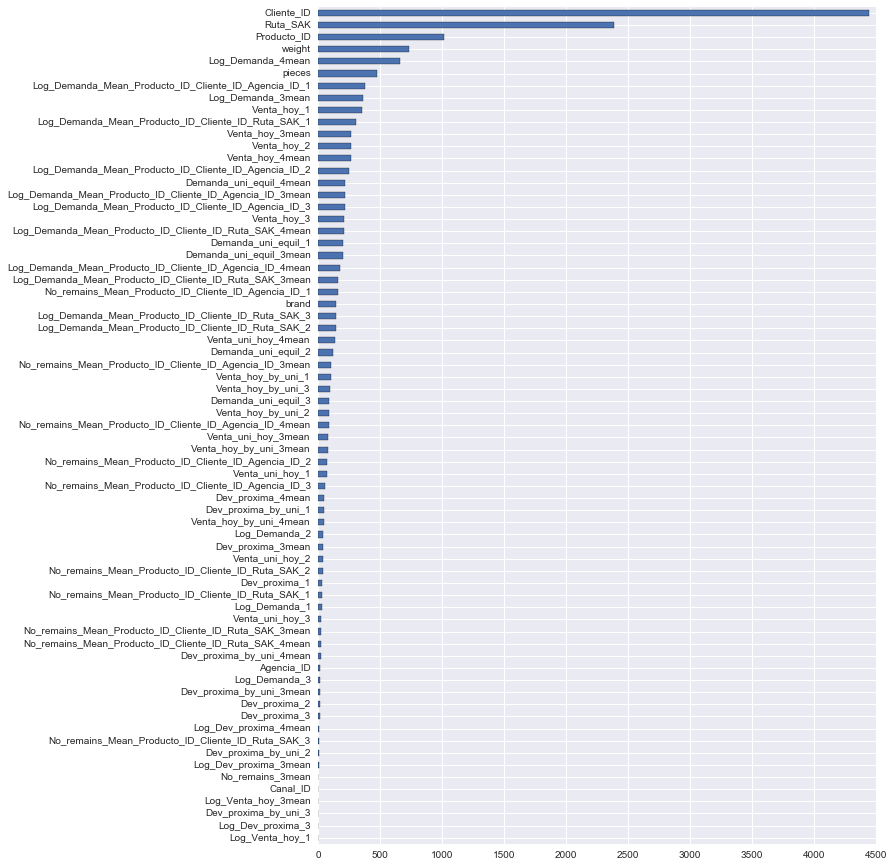

In [14]:
feat_imp = pd.Series(xgb_model.booster().get_fscore()).sort_values()
feat_imp.head(100).plot.barh(figsize=(10,15))

print('Train:', np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))
print('Test whole set:', np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test))))
print('Test 8 week:', np.sqrt(mean_squared_error(y_test.loc[8], xgb_model.predict(X_test.loc[8]))))
print('Test 9 week:', np.sqrt(mean_squared_error(y_test.loc[9], xgb_model.predict(X_test.loc[9]))))

Посмотрим на то, какие из трансформаций оказались хорошими

In [15]:
def transformaton_types(feat_list):
    features = pd.DataFrame(feat_list, columns = ['Features'])
    features['Original'] = features['Features']
    features['LagWidth'] = features['Features'].str.extract('(\d)mean', expand=True)
    features.loc[~features.LagWidth.isnull(), 'Original'] = features['Original'].str.replace('_(\d)mean', '')
    features['Lag'] = features.loc[features.LagWidth.isnull(), 'Features'].str.extract('_(\d)', expand=True)
    features.loc[~features.Lag.isnull(), 'Original'] = features['Original'].str.replace('_(\d)', '')
    features['Split'] = features['Original'].apply(lambda f: f.split('_Mean_')[1] if '_Mean_' in f else np.nan)
    features['Original'] = features['Features'].apply(lambda f: f.split('_Mean_')[0])
    return features


features = transformaton_types(feat_imp.index)
features['Important'] = features['Features'].isin(feat_imp.head(50).index).astype(int)
features

,Features,Original,LagWidth,Lag,Split,Important
0,Log_Venta_hoy_1,Log_Venta_hoy_1,NaN,1,NaN,1
1,Log_Dev_proxima_3,Log_Dev_proxima_3,NaN,3,NaN,1
2,Dev_proxima_by_uni_3,Dev_proxima_by_uni_3,NaN,3,NaN,1
3,Log_Venta_hoy_3mean,Log_Venta_hoy_3mean,3,NaN,NaN,1
4,Canal_ID,Canal_ID,NaN,NaN,NaN,1
5,No_remains_3mean,No_remains_3mean,3,NaN,NaN,1
6,Log_Dev_proxima_3mean,Log_Dev_proxima_3mean,3,NaN,NaN,1
7,Dev_proxima_by_uni_2,Dev_proxima_by_uni_2,NaN,2,NaN,1
8,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_3,No_remains,NaN,3,Producto_ID_Cliente_ID_Ruta_SAK,1
9,Log_Dev_proxima_4mean,Log_Dev_proxima_4mean,4,NaN,NaN,1


Важными назовем топ-50 фич

In [16]:
pd.crosstab(features.Split, features.Important)

Important,0,1
Split,,
Producto_ID_Cliente_ID_Agencia_ID,4,6
Producto_ID_Cliente_ID_Ruta_SAK,2,8


In [18]:
pd.crosstab([features.Lag.astype(str), features.LagWidth.astype(str)], features.Important)

Important     0   1
Lag LagWidth       
1   nan       3   9
2   nan       2   9
3   nan       2  10
nan 3         3  11
    4         4   8
    nan       5   3